In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay
)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving TEST_FINAL.csv to TEST_FINAL.csv
Saving TRAIN.csv to TRAIN.csv
User uploaded file "TEST_FINAL.csv" with length 849045 bytes
User uploaded file "TRAIN.csv" with length 9329613 bytes


In [ ]:
df1 = pd.read_csv("TEST_FINAL.csv")

In [ ]:
print("shape of df1(Test):", df1.shape )

shape of df1(Test): (22265, 8)


In [ ]:
df1

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No
...,...,...,...,...,...,...,...,...
22260,T1210601,186,S2,L5,R2,2019-07-31,0,No
22261,T1210602,11,S4,L2,R1,2019-07-31,0,No
22262,T1210603,185,S1,L1,R3,2019-07-31,0,Yes
22263,T1210604,69,S1,L1,R4,2019-07-31,0,No


In [ ]:
df2 = pd.read_csv("TRAIN.csv")

In [ ]:
print("shape of df1(TRAIN):", df2.shape)

shape of df1(TRAIN): (188340, 10)


In [ ]:
df = pd.concat([df1,df2])

In [26]:
df2

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52
...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41


In [18]:
 #checking the columns dtypes and the basic info of the data frame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [19]:
# checking for the NULL values
df2.isnull().sum()

,0
ID,0
Store_id,0
Store_Type,0
Location_Type,0
Region_Code,0
Date,0
Holiday,0
Discount,0
#Order,0
Sales,0


In [20]:
colum_list = list(df.columns)
colum_list

['ID',
 'Store_id',
 'Store_Type',
 'Location_Type',
 'Region_Code',
 'Date',
 'Holiday',
 'Discount',
 '#Order',
 'Sales']

In [23]:
df2.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,188340,188340,T1188340,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_id,188340.0,NaN,NaN,NaN,183.0,105.366308,1.0,92.0,183.0,274.0,365.0
Store_Type,188340,4,S1,88752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location_Type,188340,5,L1,85140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region_Code,188340,4,R1,63984,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,188340,516,2019-05-31,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Holiday,188340.0,NaN,NaN,NaN,0.131783,0.338256,0.0,0.0,0.0,0.0,1.0
Discount,188340,2,No,104051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#Order,188340.0,NaN,NaN,NaN,68.205692,30.467415,0.0,48.0,63.0,82.0,371.0
Sales,188340.0,NaN,NaN,NaN,42784.327982,18456.708302,0.0,30426.0,39678.0,51909.0,247215.0


In [24]:
# printing the value counts of each column
for col in colum_list:
    print('-------------------------')
    print(f"{col} the value counts: {df2[col].nunique()}")
    print('-------------------------')

-------------------------
ID the value counts: 188340
-------------------------
-------------------------
Store_id the value counts: 365
-------------------------
-------------------------
Store_Type the value counts: 4
-------------------------
-------------------------
Location_Type the value counts: 5
-------------------------
-------------------------
Region_Code the value counts: 4
-------------------------
-------------------------
Date the value counts: 516
-------------------------
-------------------------
Holiday the value counts: 2
-------------------------
-------------------------
Discount the value counts: 2
-------------------------
-------------------------
#Order the value counts: 299
-------------------------
-------------------------
Sales the value counts: 47422
-------------------------


We could see that there are 365 store id

4 types of stoe
5 location type and 4 Region count

In [25]:
col_list1 = [
 'Store_Type',
 'Location_Type',
 'Region_Code']

for cat in col_list1:
    print('-------------------------')
    print(f"{col} the sum of sales for {cat}: {df2.groupby(cat)['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)}")
    print('-------------------------')
    print('-------------------------')
    print(f"{col} the average of sales for {cat}: {df2.groupby(cat)['Sales'].mean().reset_index().sort_values(by='Sales',ascending=False)}")
    print('-------------------------')

-------------------------
Sales the sum of sales for Store_Type:   Store_Type         Sales
0         S1  3.343866e+09
3         S4  2.752946e+09
2         S3  1.165658e+09
1         S2  7.955308e+08
-------------------------
-------------------------
Sales the average of sales for Store_Type:   Store_Type         Sales
3         S4  59945.685926
2         S3  47063.068209
0         S1  37676.511694
1         S2  27530.828222
-------------------------
-------------------------
Sales the sum of sales for Location_Type:   Location_Type         Sales
0            L1  3.529359e+09
1            L2  2.872964e+09
2            L3  9.897865e+08
4            L5  3.509163e+08
3            L4  3.149745e+08
-------------------------
-------------------------
Sales the average of sales for Location_Type:   Location_Type         Sales
1            L2  59231.480373
0            L1  41453.597889
2            L3  33072.257756
3            L4  29067.414313
4            L5  25187.787261
------------------

In [28]:
df2['Date'] = pd.to_datetime(df2['Date'])

# Create separate columns for year, month, day, and week
df2['year'] = df2['Date'].dt.year
df2['month'] = df2['Date'].dt.month
df2['day'] = df2['Date'].dt.day
df2['week'] = df2['Date'].dt.isocalendar().week  # ISO week number

print(df2.head())  # Display first few rows


         ID  Store_id Store_Type Location_Type Region_Code       Date  \
0  T1000001         1         S1            L3          R1 2018-01-01   
1  T1000002       253         S4            L2          R1 2018-01-01   
2  T1000003       252         S3            L2          R1 2018-01-01   
3  T1000004       251         S2            L3          R1 2018-01-01   
4  T1000005       250         S2            L3          R4 2018-01-01   

   Holiday Discount  #Order     Sales  year  month  day  week  
0        1      Yes       9   7011.84  2018      1    1     1  
1        1      Yes      60  51789.12  2018      1    1     1  
2        1      Yes      42  36868.20  2018      1    1     1  
3        1      Yes      23  19715.16  2018      1    1     1  
4        1      Yes      62  45614.52  2018      1    1     1  


In [29]:
df2

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,year,month,day,week
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,2018,1,1,1
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,2018,1,1,1
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,2018,1,1,1
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,2018,1,1,1
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,2018,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00,2019,5,31,22
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64,2019,5,31,22
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56,2019,5,31,22
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41,2019,5,31,22


In [30]:
temp = df2.groupby("Date")["Sales"].sum().reset_index()
temp.head()

,Date,Sales
0,2018-01-01,15345484.50
1,2018-01-02,19592415.00
2,2018-01-03,18652527.00
3,2018-01-04,19956267.00
4,2018-01-05,22902651.00
...,...,...
511,2019-05-27,17197023.00
512,2019-05-28,18652065.00
513,2019-05-29,16213497.00
514,2019-05-30,16082139.00


In [31]:
temp.set_index('Date', inplace=True)
temp.head()

,Sales
Date,
2018-01-01,15345484.50
2018-01-02,19592415.00
2018-01-03,18652527.00
2018-01-04,19956267.00
2018-01-05,22902651.00
...,...
2019-05-27,17197023.00
2019-05-28,18652065.00
2019-05-29,16213497.00


<Axes: xlabel='Date'>

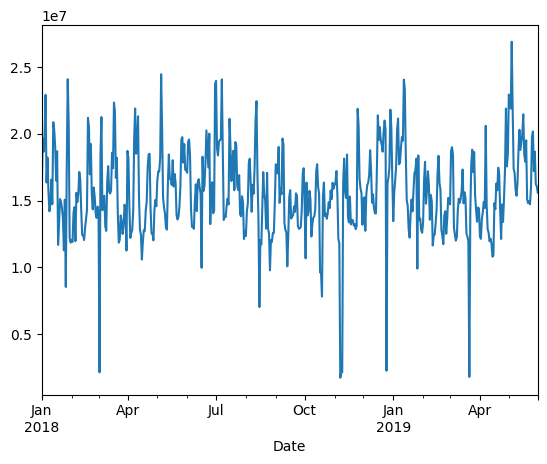

In [32]:
temp.Sales.plot()

In [33]:
temp_avg = df2[["Date","Sales"]]
temp_avg = temp_avg.groupby("Date")["Sales"].mean().reset_index()
temp_avg

,Date,Sales
0,2018-01-01,42042.423288
1,2018-01-02,53677.849315
2,2018-01-03,51102.813699
3,2018-01-04,54674.704110
4,2018-01-05,62746.989041
...,...,...
511,2019-05-27,47115.131507
512,2019-05-28,51101.547945
513,2019-05-29,44420.539726
514,2019-05-30,44060.654795


In [34]:
temp_avg.set_index('Date', inplace=True)
temp_avg.head()

,Sales
Date,
2018-01-01,42042.423288
2018-01-02,53677.849315
2018-01-03,51102.813699
2018-01-04,54674.704110
2018-01-05,62746.989041


<Axes: xlabel='Date'>

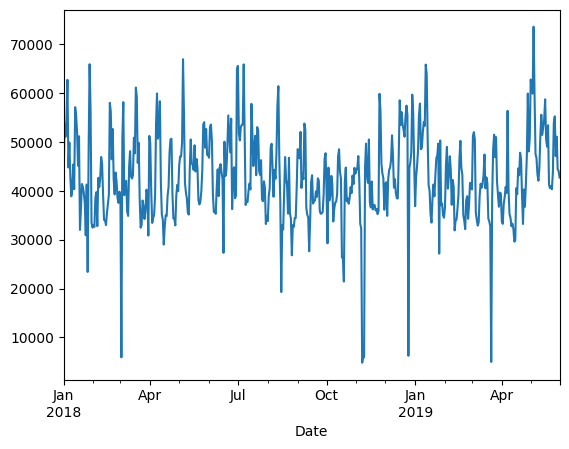

In [35]:
temp_avg.Sales.plot()